# Introduction
In this notebook, we are going to explore the Adidas Sales Dataset which represents the company's sales in the United States, and we will try to answer 3 questions:

1- Does day of week has an effect on total sales

2- At which price per unit do we generate the most operating margin

3- Which sales method\product\state generated the most operating margin

You can find the link to the dataset on Kaggle __[here](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)__.

First, let's import the needed libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


Now, lets read our dataset, format it to a usable form, and explore it.

In [2]:
# We will skip the first 4 rows of the file, because these rows don't have any information
# We will also drop the first column because it's an empty column
df = pd.read_excel(r"Data\Adidas US Sales Datasets.xlsx", skiprows=4)
df = df.drop(columns='Unnamed: 0')

In [3]:
# Let's print the column names and their dtype
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [4]:
# Let's see take a look at some of the rows in the dataset
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## 1- Does day of week has an effect on total sales
To answer this question, let's group each day of week in its own group and then sum the results. Then, let's plot the results.

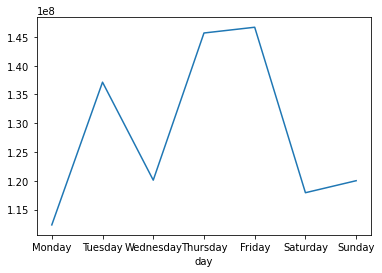

In [5]:
# Since the dtype of Invoice Date column is datetime64, we can make use of the strftime function and give it %A format code
# which displays full weekday name according to documentation.
df['day'] = df['Invoice Date'].dt.strftime('%A')

# Now we will group each day together and then sum the Total Sales column
sales = df.groupby(['day'])[['Total Sales']].sum()

# Let's use the loc method to arrange the sales results in a human readable order then plot it
sales = sales.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sales['Total Sales'].plot();

As we can see from the graph, sales are highest on Thursdays and Fridays, while they are lowest on Saturdays, Sundays, and Mondays.

## 2- At which price per unit do we generate the most operating margin
To answer this question, let's group each price per unit in its own group and then sum the results and calculate the operating margin. Then, we will filter the insignificant results (total sales below 1 million) and plot the results.

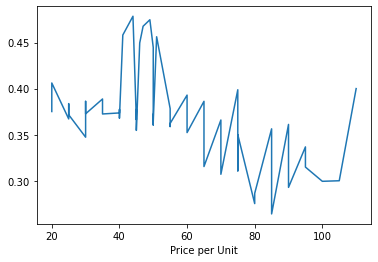

In [6]:
# Now we will group each Price per Unit together and then sum the Total Sales and Operating Profit columns
results = df.groupby('Price per Unit')[['Total Sales','Operating Profit']].sum()

# We will calculate the Operating Margin by dividing Operating Profit by Total Sales
results['Operating Margin'] = results['Operating Profit']/results['Total Sales']

# Let's filter the any Total Sales below 1 million, then plot
results = results[results['Total Sales']>1e6]
results['Operating Margin'].plot();

The graph shows that, generally speaking, the lowest our price per unit is, the higher our operating margin.

## 3- Which sales method\product\state generated the most operating margin
To answer this question, let's group each sales method\product\state in its own group and then sum the results and calculate the operating margin.

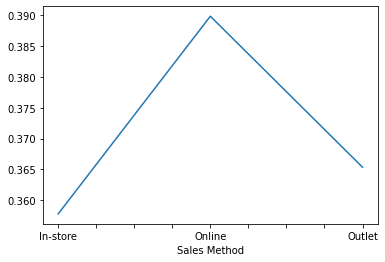

In [7]:
results = df.groupby('Sales Method')[['Total Sales','Operating Profit']].sum()
results['Operating Margin'] = results['Operating Profit']/results['Total Sales']
results['Operating Margin'].plot();

The graph shows that Online sales method has the highest operating margin.

We will do this again for Product.

In [8]:
results = df.groupby('Product')[['Total Sales','Operating Profit']].sum()
results['Operating Margin'] = results['Operating Profit']/results['Total Sales']
results = results.sort_values('Operating Margin', ascending=False)
results['Operating Margin']

Product
Men's Street Footwear        0.396513
Women's Apparel              0.383442
Women's Athletic Footwear    0.365517
Men's Apparel                0.361784
Women's Street Footwear      0.352303
Men's Athletic Footwear      0.337383
Name: Operating Margin, dtype: float64

This sorted breakdown shows that Men's Street Footwear generated the most operating margin, while Men's Athletic Footwear generated the least.

Finally, we will do the same to see which state generated the most operating margin.

In [9]:
results = df.groupby('State')[['Total Sales','Operating Profit']].sum()
results['Operating Margin'] = results['Operating Profit']/results['Total Sales']
results = results.sort_values('Operating Margin', ascending=False)
results[['Total Sales','Operating Margin']]

,Total Sales,Operating Margin
State,,
Alabama,17633424.0,0.518764
Tennessee,18067440.0,0.470109
Michigan,18625433.0,0.436816
Idaho,19276878.0,0.421288
Nebraska,5929038.0,0.411446
Mississippi,15591709.0,0.408492
Ohio,18484583.0,0.407304
North Carolina,23956531.0,0.407255
Missouri,9683265.0,0.403501


The results are shocking!!

There is a difference in operating margin between states. Alabama has almost double Hawaii's operating margin which is huge. Also, despite the fact that New Mexico and Idaho having almost the same total sales, there operating margin almost differs by 10%! 